**Project Problem Statement - Potential Customers Prediction**

The goal of this project is to predict potential customers based on their behavior on the website. We will analyze various features such as time spent on the website, number of visits, and other relevant attributes to build predictive models.

**Context**

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023, with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc., it is now preferable to traditional education.

The online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like:

- The customer interacts with the marketing front on social media or other online platforms.
- The customer browses the website/app and downloads the brochure.
- The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

**Objective**

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate the resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:

- Analyze and build an ML model to help identify which leads are more likely to convert to paid customers.
- Find the factors driving the lead conversion process.
- Create a profile of the leads who are likely to convert.

**Data Description**

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

**Data Dictionary**


- ID: ID of the lead

- age: Age of the lead

- current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'

- first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'

- profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)

- website_visits: How many times has a lead visited the website

- time_spent_on_website: Total time spent on the website

- page_views_per_visit: Average number of pages on the website viewed during the visits.

- last_activity: Last interaction between the lead and ExtraaLearn.

   - Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
   - Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
   - Website Activity: Interacted on live chat with representative, Updated profile on website, etc

- print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.

- print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.

- digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.

- educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.

- referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.

- status: Flag indicating whether the lead was converted to a paid customer or not.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing necessary libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

# To encode categorical variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



In [4]:
# Loading the DataFrame
file_path = r"/content/drive/MyDrive/Colab Notebooks/POTENTIAL_CUSTOMERS_PREDICTION_ELECTIVE/ExtraaLearn_Customers_Prediction.csv"
df = pd.read_csv(file_path)

# Verify the data
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
# Copying data to another variable to avoid any changes to original data
df = df.copy()

# Verify the data
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


# Data Overview

In [6]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (4612, 15)


**Observation:**
-  There are 4612 rows and 15 columns in the dataset.

In [7]:
# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [8]:
# Display the last five rows of the DataFrame
print("Last five rows of the dataset:")
display(df.tail())

Last five rows of the dataset:


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [9]:
# Display basic information about the dataset
#print("First few rows of the dataset:")
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

None

In [11]:
# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
ID                        object
age                        int64
current_occupation        object
first_interaction         object
profile_completed         object
website_visits             int64
time_spent_on_website      int64
page_views_per_visit     float64
last_activity             object
print_media_type1         object
print_media_type2         object
digital_media             object
educational_channels      object
referral                  object
status                     int64
dtype: object


In [12]:
# Check for columns with unique values
unique_counts = df.nunique()
print(unique_counts)

# Identify potential identifier columns
identifier_cols = unique_counts[unique_counts == len(df)].index.tolist()
print(f"Potential identifier columns: {identifier_cols}")

# Drop identifier columns if any
if identifier_cols:
    df = df.drop(columns=identifier_cols)
    print(f"Dropped columns: {identifier_cols}")
else:
    print("No identifier columns to drop.")

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64
Potential identifier columns: ['ID']
Dropped columns: ['ID']


**Observations:**
-  Age, website_visits, time_spent_on_website, page_views_per_visit, page_views_per_visit and status are of **numeric data type** and the rest of the columns are of **object data type**.
- The number of non-null values is the same as the total number of entries in the data, i.e., **there are no null values.**
- The column ID is an identifier for customers in the data. This column will not help with our analysis so we can drop it.

In [13]:
# Display summary statistics
print("\nSummary statistics:")
print(df.describe().T)


Summary statistics:
                        count        mean         std   min        25%  \
age                    4612.0   46.201214   13.161454  18.0   36.00000   
website_visits         4612.0    3.566782    2.829134   0.0    2.00000   
time_spent_on_website  4612.0  724.011275  743.828683   0.0  148.75000   
page_views_per_visit   4612.0    3.026126    1.968125   0.0    2.07775   
status                 4612.0    0.298569    0.457680   0.0    0.00000   

                           50%         75%       max  
age                     51.000    57.00000    63.000  
website_visits           3.000     5.00000    30.000  
time_spent_on_website  376.000  1336.75000  2537.000  
page_views_per_visit     2.792     3.75625    18.434  
status                   0.000     1.00000     1.000  


In [14]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


**Observations:**
1.  No Missing Values – The dataset is complete, which simplifies preprocessing.
2. Lead Conversion Rate (~30%) – About 30% (status = 1) of leads convert, while 70% don’t.
3. Numerical Features:
   -  Age: Ranges from 18 to 63, with a mean of 46.
   -  Website Activity:
      - website_visits: Most leads visit 2-5 times (max = 30).
      - time_spent_on_website: Varies widely (0 to 2,537 seconds).
      - page_views_per_visit: Median ~2.8 pages (max = 18.4).

In [15]:
# Checking for duplicate values in the data
df.duplicated().sum()

np.int64(14)

**Observation:**
- Data contains unique rows. There is no need to remove any rows.

# Exploratory Data Analysis
Perform exploratory data analysis using visualizations to understand the data distribution and relationships.

### **Univariate Analysis**

In [16]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None, title=None):
    """
    Boxplot and histogram combined to show the distribution of a numerical feature.

    Parameters:
    - df: DataFrame containing the data.
    - feature: Column name (numerical feature) to visualize.
    - figsize: Tuple specifying figure size (default: (12,7)).
    - kde: Boolean, whether to show density curve on histogram (default: False).
    - bins: Number of bins for histogram (default: None, auto-detect).
    - title: Optional title for the plot (default: None).

    The function highlights:
    - Mean (Green Star in Boxplot, Dashed Green Line in Histogram).
    - Median (Solid Black Line in Histogram).
    """
    # Check if the feature exists in the DataFrame
    if feature not in df.columns:
        raise ValueError(f"Feature '{feature}' not found in the DataFrame.")

    # Check if the feature is numeric
    if not pd.api.types.is_numeric_dtype(df[feature]):
        raise TypeError(f"Feature '{feature}' must be numeric.")

    # Create the figure and subplots
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize
    )

    # Boxplot with mean distinction
    sns.boxplot(
        data=df, x=feature, ax=ax_box, showmeans=True,
        meanprops={"marker": "o", "markerfacecolor": "green", "markeredgecolor": "black", "markersize": 8},
        color="violet"
    )

    # Histogram with mean and median lines
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist, bins=bins, color='royalblue'
    )

    # Add vertical lines for mean and median
    ax_hist.axvline(df[feature].mean(), color="green", linestyle="--", linewidth=2, label="Mean")
    ax_hist.axvline(df[feature].median(), color="black", linestyle="-", linewidth=2, label="Median")

    # Add legend for better interpretation
    ax_hist.legend(loc="upper right")

    # Add title if provided
    if title:
        ax_hist.set_title(title)

    # Final layout adjustments
    plt.tight_layout()
    plt.show()

    # Return the figure object for further customization or saving
    #return fig

**Amount of time spent on the website**

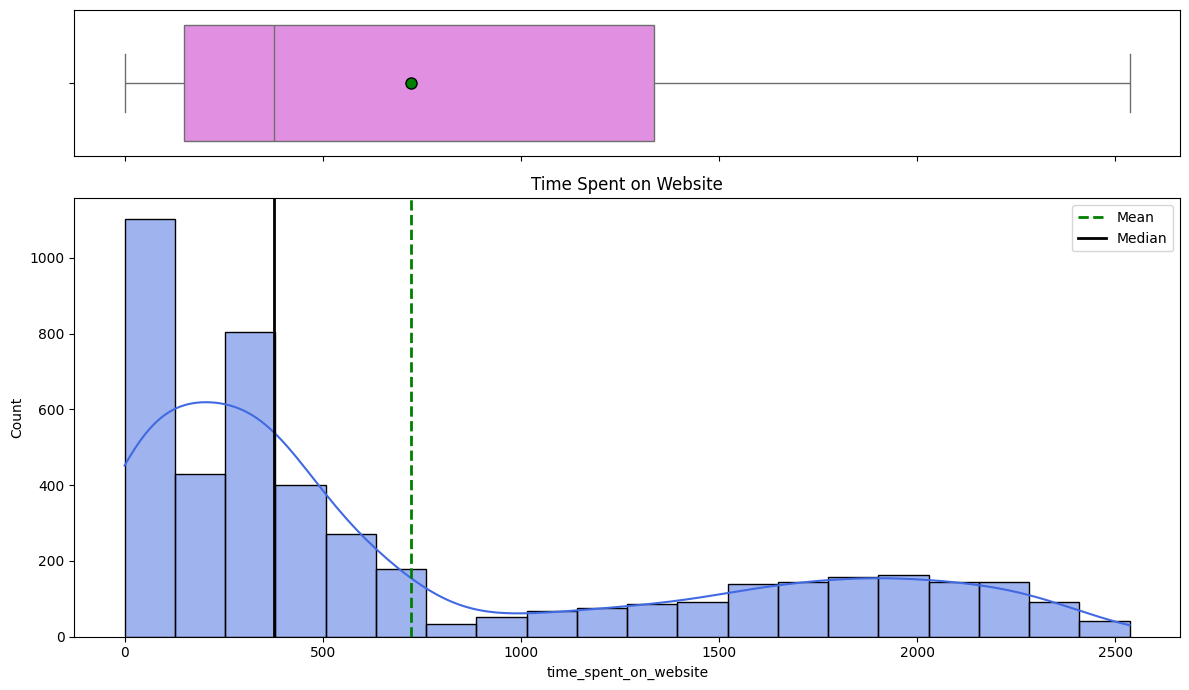

In [17]:
# Visualize 'time_spent_on_website'
histogram_boxplot(df, 'time_spent_on_website', kde=True, bins=20, title='Time Spent on Website')

**Observations:**

1. The boxplot shows that the time spent on the website is right-skewed, with a median of approximately 6 minutes. Outliers are present, representing users who spent significantly more time on the website.
2. The histogram confirms the right-skewed distribution, with most users spending a short amount of time on the website and a long tail extending to the right.
3. The mean time spent on the website is slightly higher than the median, indicating the presence of outliers that skew the distribution.
4. Users who spend more time on the website may represent highly engaged leads, and the website's content or user experience could be optimized to encourage longer engagement.

**Number of times for website visits**

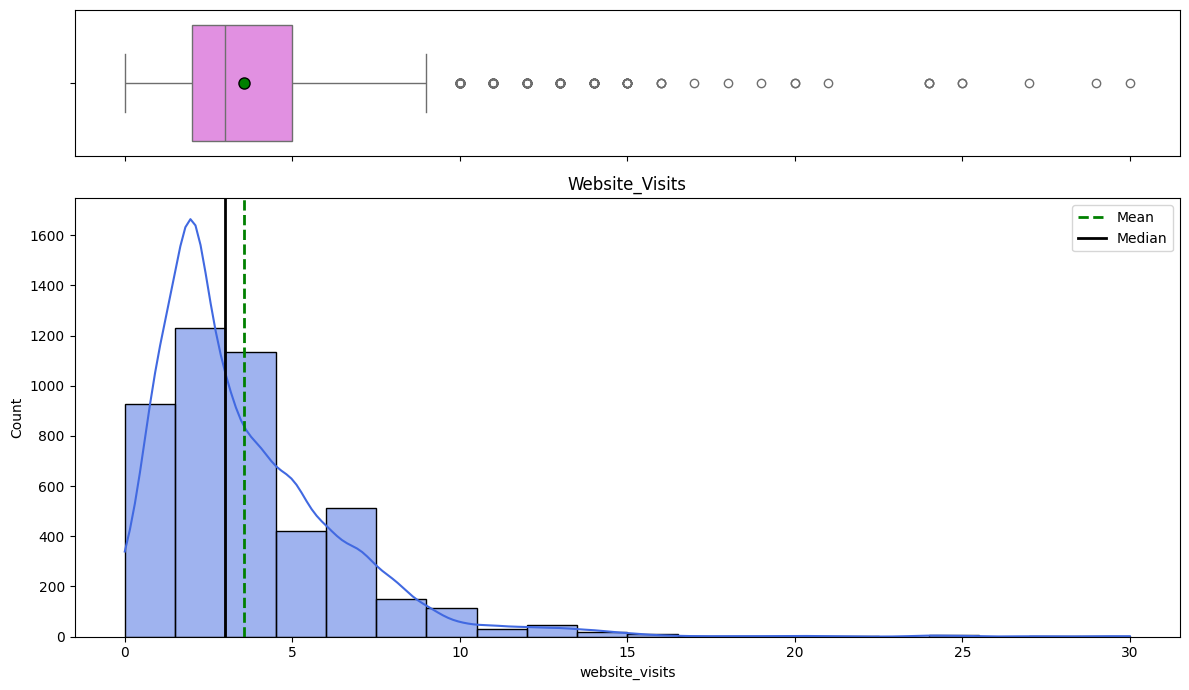

In [18]:
# Visualize 'website_visits'
histogram_boxplot(df, 'website_visits', kde=True, bins=20, title='Website_Visits')


**Observations:**
1. The boxplot shows that the number of website visits is right-skewed, with a median of approximately 1 visit.
2. The histogram shows that the distribution is right-skewed, with a long tail extending to the right. The majority of leads visit the website between 1 and 3 times.
3. The mean number of website visits is slightly higher than the median, indicating the presence of higher values that skew the distribution to the right.
4. There are several outliers on the higher end of the number of website visits, as indicated by the points outside the whiskers in the boxplot.


**Number of website pages viewed for every visit**

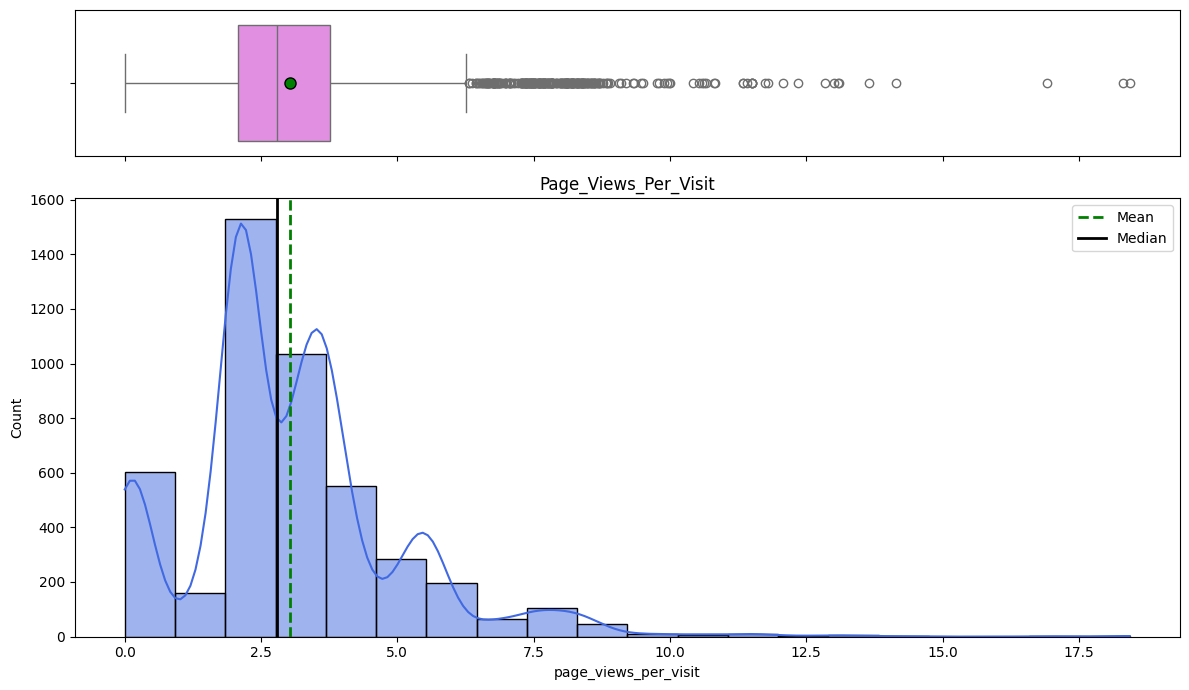

In [19]:
# Visualize 'website_visits'
histogram_boxplot(df, 'page_views_per_visit', kde=True, bins=20, title='Page_Views_Per_Visit')

**Observations:**
1. The boxplot shows that the number of website pages viewed per visit is right-skewed, with a median of about 2.5 page.
2. The histogram shows that the distribution is right-skewed, with a long tail extending to the right. The majority of leads view between 1 and 3 website pages per visit.
3. The mean number of website pages viewed per visit is slightly higher than the median, indicating the presence of higher values that skew the distribution to the right.
4. There are several outliers on the higher end of the number of website pages viewed per visit, as indicated by the points outside the whiskers in the boxplot.

### **Bivariate Analysis**


In [20]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Handle missing values temporarily for EDA
numeric_df = numeric_df.fillna(0)  # Fill missing values with 0 (or use another strategy)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Sort correlations with the target variable ('status') in descending order
correlation_with_target = correlation_matrix['status'].sort_values(ascending=False)
print("Correlation with Target Variable (status):")
print(correlation_with_target)

# Select the top correlated numerical feature (excluding 'status' itself)
if len(correlation_with_target) > 1:  # Ensure there are other features besides 'status'
    top_feature = correlation_with_target.index[1]  # The first index is 'status' itself
    print(f"Top correlated feature with 'status': {top_feature}")
else:
    print("No numerical features are correlated with 'status'.")

Correlation with Target Variable (status):
status                   1.000000
time_spent_on_website    0.302100
age                      0.122084
page_views_per_visit     0.000307
website_visits          -0.006609
Name: status, dtype: float64
Top correlated feature with 'status': time_spent_on_website


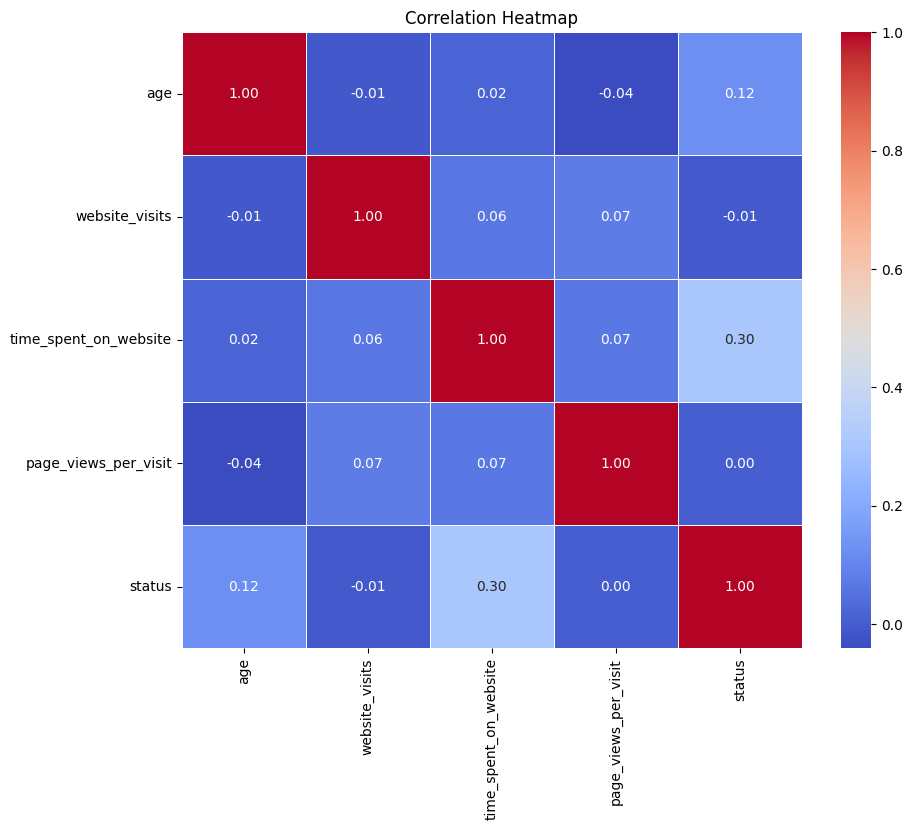

In [21]:
# Correlation Matrix: Correlation between numerical features

# Select only numeric columns from the DataFrame
df_numeric = df.select_dtypes(include=['number'])

# Set figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

**Observations:**
1. The correlation matrix shows that there is a strong positive correlation (correlation coefficient > 0.07) between the time spent on the website and the number of website visits. This suggests that the longer leads spend on the website, the more often they visit it.
2. The correlation matrix also shows a strong positive correlation (correlation coefficient > 0.07) between the number of website visits and the number of website pages viewed per visit. This suggests that the more leads visit the website, the more often they view it.
3. There is a strong negative correlation (correlation coefficient < -0.04) between age and the number of pages viewed for every visit.



<Axes: xlabel='website_visits', ylabel='status'>

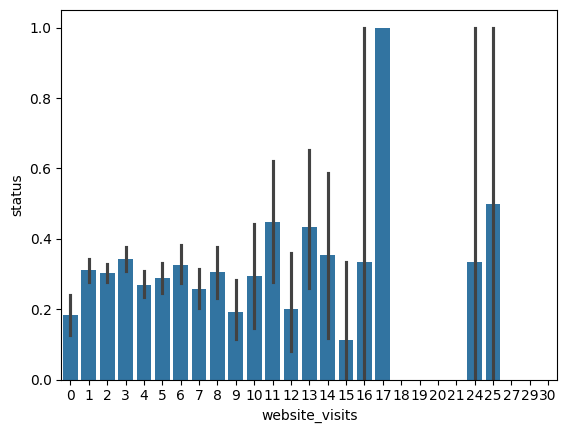

In [22]:
sns.barplot(x = "website_visits" , y = "status", data = df)

**Observation:**
1. The bar plot shows that the majority of leads (around 70%) have not converted, while only 30% have converted. This suggests that there might be a potential problem with the conversion rate, as the number of converted leads is significantly lower than the total number of leads.


In [23]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart for bivariate analysis.

    Parameters:
    - data: DataFrame containing the data.
    - predictor: Independent variable (categorical feature).
    - target: Dependent variable (target feature).
    """
    # Count the unique categories in the predictor
    count = data[predictor].nunique()

    # Create a crosstab for counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=data[target].value_counts().index[-1], ascending=False
    )
    print("Category Counts:")
    print(tab1)
    print("-" * 120)

    # Create a normalized crosstab for proportions
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=data[target].value_counts().index[-1], ascending=False
    )

    # Plot the stacked bar chart
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 3, 6), colormap="viridis")

    # Add labels and title
    plt.title(f"Stacked Bar Plot of {predictor} vs {target}", fontsize=14)
    plt.xlabel(predictor, fontsize=12)
    plt.ylabel("Proportion", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title=target, loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()

    # Show the plot
    plt.show()

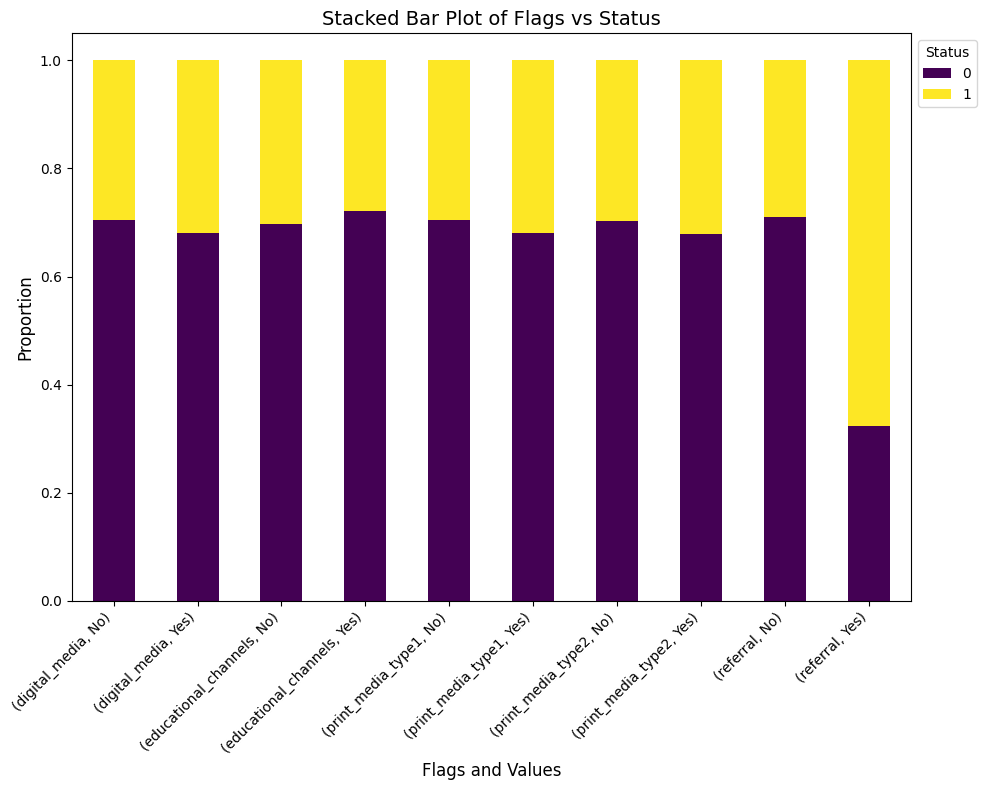

In [24]:
# Select the categorical flag features
flag_features = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Reshape the data using pd.melt()
melted_df = pd.melt(df, id_vars=['status'], value_vars=flag_features,
                    var_name='Flag', value_name='Value')

# Create a crosstab for proportions
crosstab = pd.crosstab(index=[melted_df['Flag'], melted_df['Value']],
                       columns=melted_df['status'], normalize='index')

# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='viridis')

# Add labels and title
plt.title('Stacked Bar Plot of Flags vs Status', fontsize=14)
plt.xlabel('Flags and Values', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the plot
plt.show()

**Observations:**
- This stacked bar plot illustrates the likelihood of converting leads into paid customers based on interactions with various media or channels.
- The only flag combination associated with converted leads is the referral flag (Yes), which shows a significantly higher proportion of status = 1 compared to status = 0.
- In contrast, all other flag combinations have a larger proportion of status = 0 than status = 1.



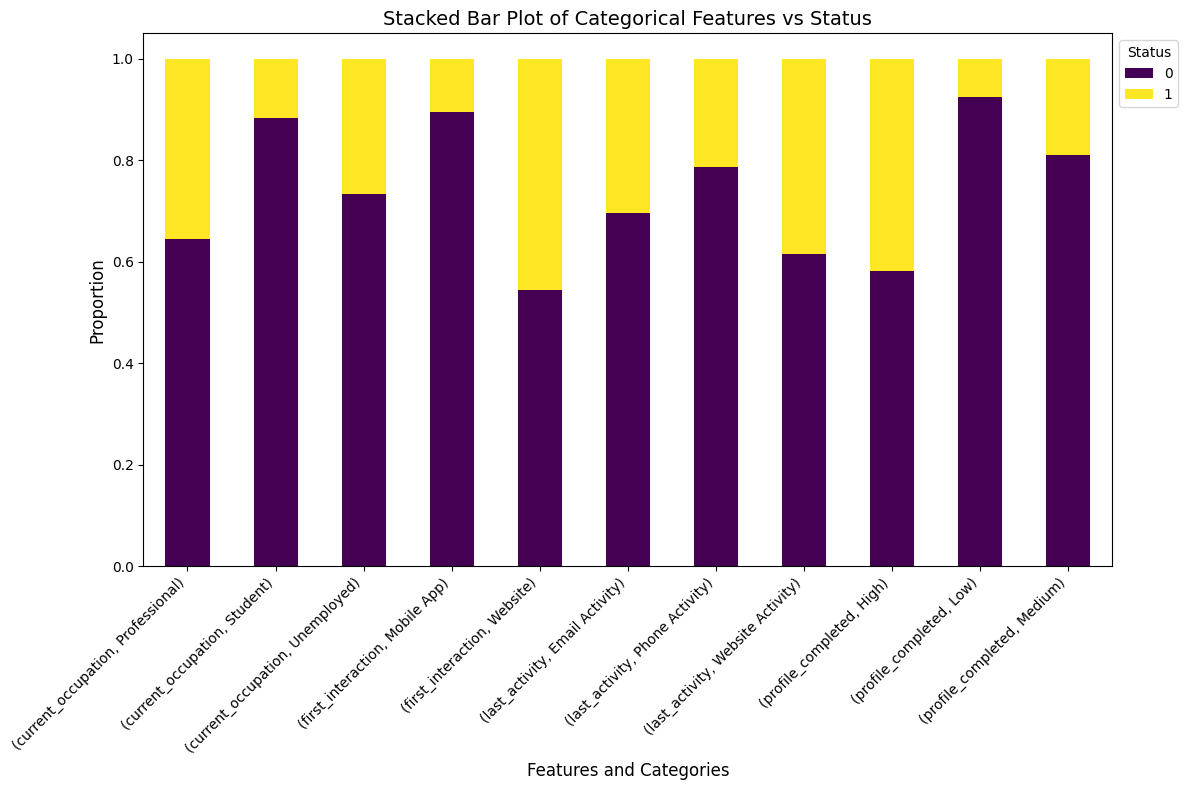

In [25]:
# Select the remaining categorical features
categorical_features = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

# Reshape the data using pd.melt()
melted_categorical_df = pd.melt(df, id_vars=['status'], value_vars=categorical_features,
                                var_name='Feature', value_name='Category')

# Create a crosstab for proportions
categorical_crosstab = pd.crosstab(index=[melted_categorical_df['Feature'], melted_categorical_df['Category']],
                                   columns=melted_categorical_df['status'], normalize='index')

# Plot the stacked bar chart
categorical_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add labels and title
plt.title('Stacked Bar Plot of Categorical Features vs Status', fontsize=14)
plt.xlabel('Features and Categories', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the plot
plt.show()

**Observations:**
- The remaining categorical features did not result in any conversions.
- The remaining features did not have any significant conversation as illustrated in the stacked bar plot above. The flag combinations have a larger proportion of of status = 0 than status = 1.

**Additional Questions in order to further understand the data structure**

1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.


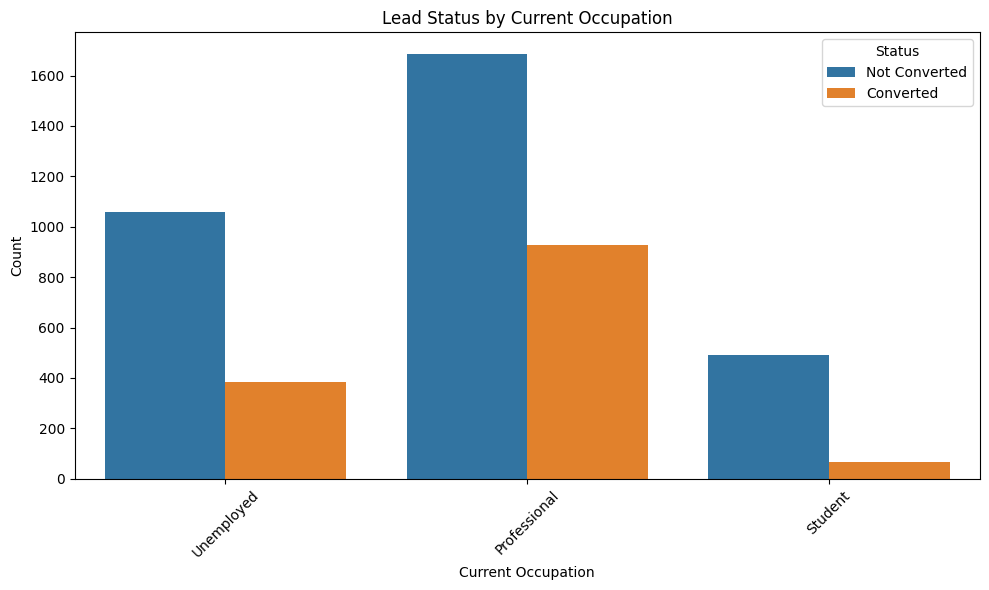

Conversion Rates by Current Occupation:
current_occupation
Professional    0.355122
Student         0.117117
Unemployed      0.265788
Name: status, dtype: float64


In [26]:
# Analyze the effect of current occupation on lead status
plt.figure(figsize=(10, 6))
sns.countplot(x='current_occupation', hue='status', data=df)
plt.title('Lead Status by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status', labels=['Not Converted', 'Converted'])
plt.tight_layout()
plt.show()

# Calculate conversion rates for each occupation
conversion_rates = df.groupby('current_occupation')['status'].mean()
print("Conversion Rates by Current Occupation:")
print(conversion_rates)

**Observation:**
- The bar plot shows that the majority of leads who converted to paid customers are professionals, followed by unemployment individuals and students.


2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

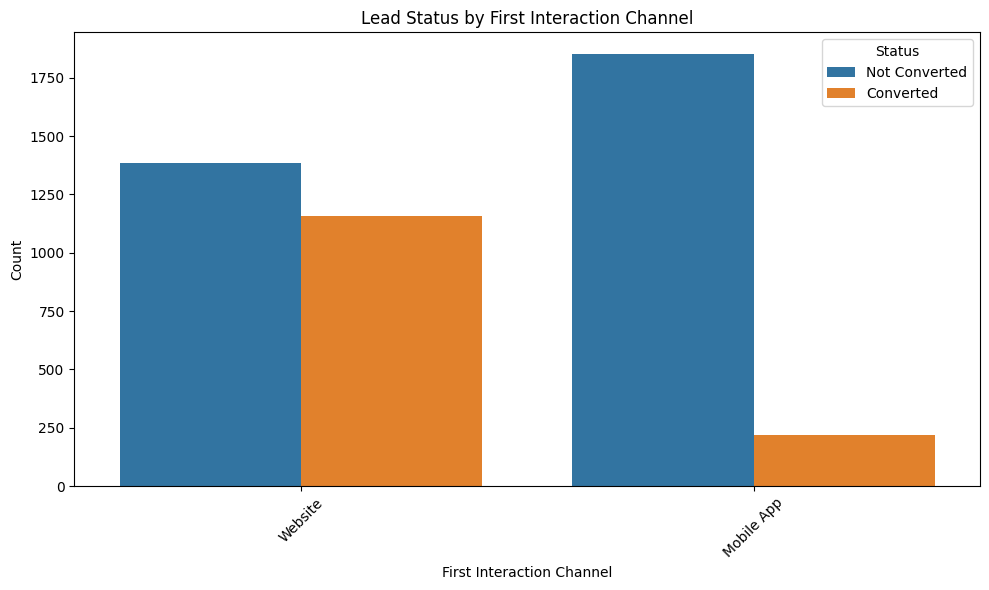

Conversion Rates by First Interaction Channel:
first_interaction
Mobile App    0.105314
Website       0.455940
Name: status, dtype: float64


In [27]:
# Analyze the effect of first interaction on lead status
plt.figure(figsize=(10, 6))
sns.countplot(x='first_interaction', hue='status', data=df)
plt.title('Lead Status by First Interaction Channel')
plt.xlabel('First Interaction Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status', labels=['Not Converted', 'Converted'])
plt.tight_layout()
plt.show()

# Calculate conversion rates for each first interaction channel
conversion_rates = df.groupby('first_interaction')['status'].mean()
print("Conversion Rates by First Interaction Channel:")
print(conversion_rates)

**Observation:**
- Based on the bar chart above, the Website is the primary first interaction channel leading to conversions into paid customers, compared to the Mobile App.

3. The company uses multiple modes to interact with prospects. Which way of interaction works best?

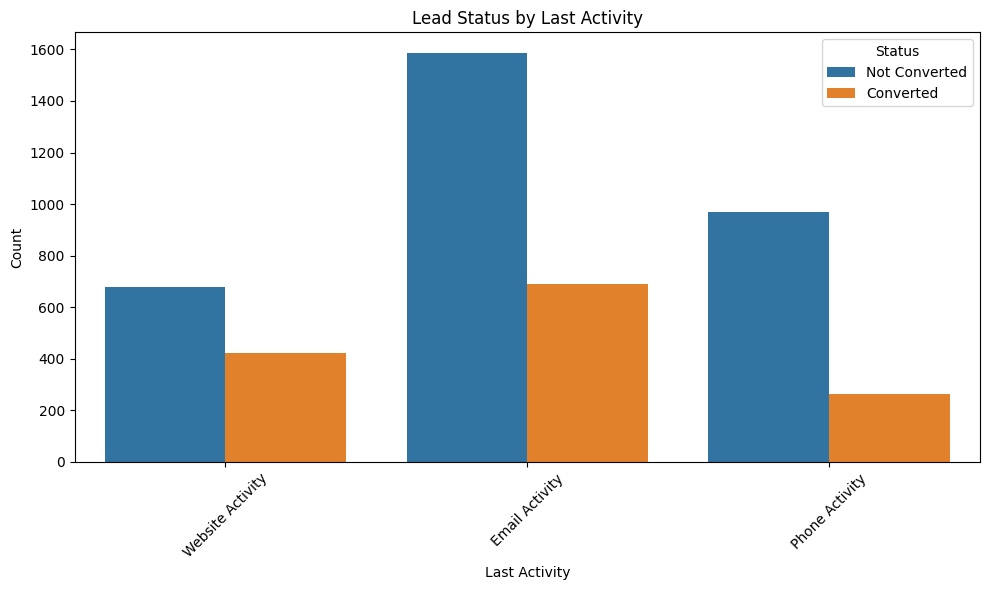

Conversion Rates by Last Activity:
last_activity
Email Activity      0.303336
Phone Activity      0.213128
Website Activity    0.384545
Name: status, dtype: float64


In [28]:
# Analyze the effect of last activity on lead status
plt.figure(figsize=(10, 6))
sns.countplot(x='last_activity', hue='status', data=df)
plt.title('Lead Status by Last Activity')
plt.xlabel('Last Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status', labels=['Not Converted', 'Converted'])
plt.tight_layout()
plt.show()

# Calculate conversion rates for each last activity
conversion_rates = df.groupby('last_activity')['status'].mean()
print("Conversion Rates by Last Activity:")
print(conversion_rates)

**Observation:**
- The bar plot shows that leads who interact with the company through email activity are more likely to convert to paid customers compared to website and phone activity

4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

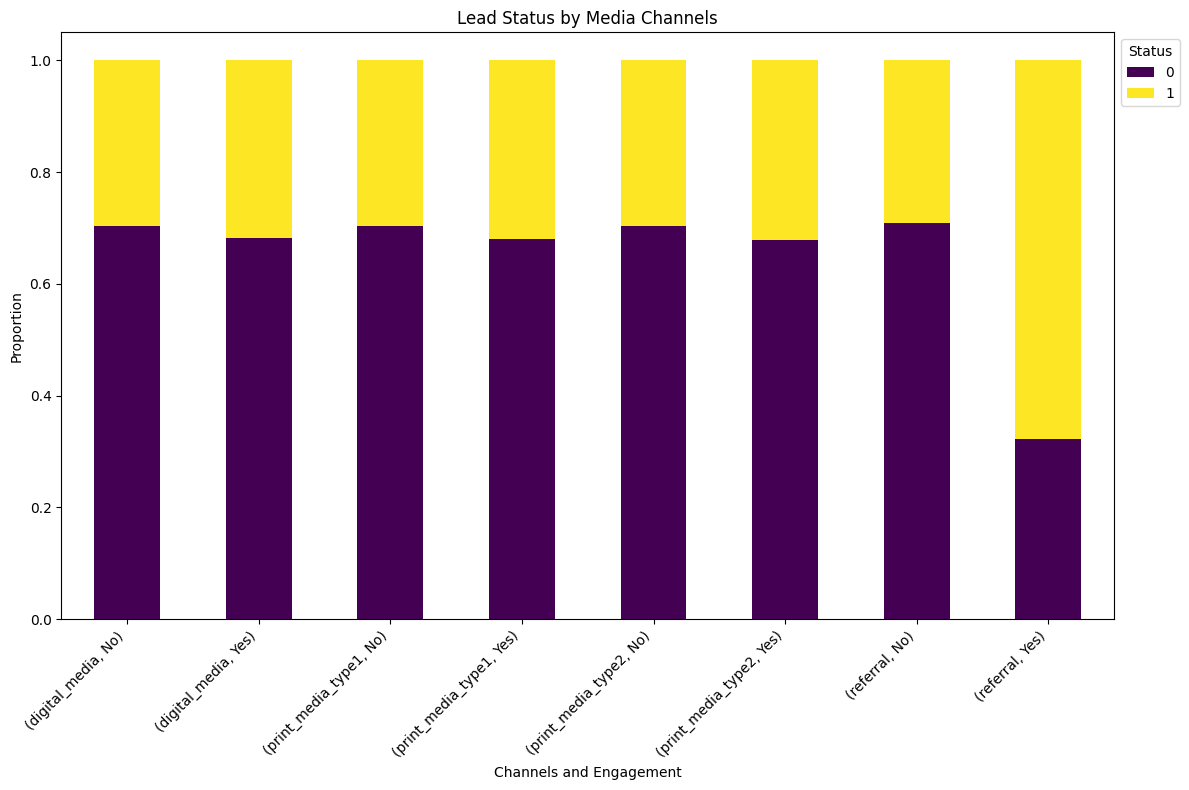

Conversion Rates for print_media_type1:
print_media_type1
No     0.29599
Yes    0.31992
Name: status, dtype: float64
Conversion Rates for print_media_type2:
print_media_type2
No     0.297328
Yes    0.321888
Name: status, dtype: float64
Conversion Rates for digital_media:
digital_media
No     0.295961
Yes    0.318786
Name: status, dtype: float64
Conversion Rates for referral:
referral
No     0.290772
Yes    0.677419
Name: status, dtype: float64


In [29]:
# Analyze the effect of media channels on lead status
flag_features = ['print_media_type1', 'print_media_type2', 'digital_media', 'referral']

# Reshape the data using pd.melt()
melted_df = pd.melt(df, id_vars=['status'], value_vars=flag_features,
                    var_name='Channel', value_name='Engaged')

# Create a crosstab for proportions
crosstab = pd.crosstab(index=[melted_df['Channel'], melted_df['Engaged']],
                       columns=melted_df['status'], normalize='index')

# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Lead Status by Media Channels')
plt.xlabel('Channels and Engagement')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Calculate conversion rates for each channel
for channel in flag_features:
    conversion_rate = df.groupby(channel)['status'].mean()
    print(f"Conversion Rates for {channel}:")
    print(conversion_rate)

**Observation:**
- The only flag combination associated with converted leads is the referral flag (Yes), which shows a significantly higher proportion of status = 1 compared to status = 0.

5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

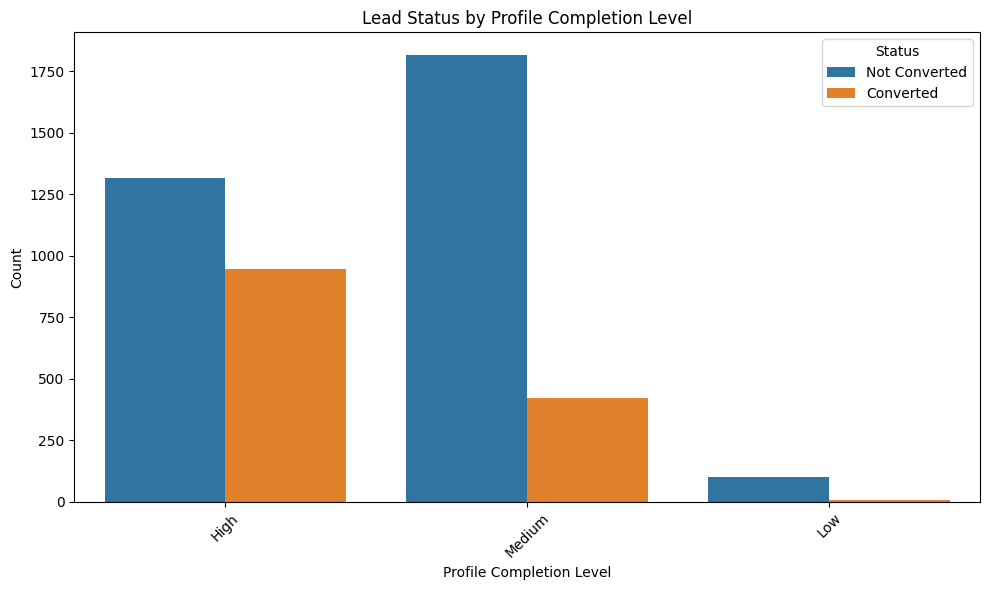

Conversion Rates by Profile Completion Level:
profile_completed
High      0.417845
Low       0.074766
Medium    0.188755
Name: status, dtype: float64


In [30]:
# Analyze the effect of profile completion on lead status
plt.figure(figsize=(10, 6))
sns.countplot(x='profile_completed', hue='status', data=df)
plt.title('Lead Status by Profile Completion Level')
plt.xlabel('Profile Completion Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status', labels=['Not Converted', 'Converted'])
plt.tight_layout()
plt.show()

# Calculate conversion rates for each profile completion level
conversion_rates = df.groupby('profile_completed')['status'].mean()
print("Conversion Rates by Profile Completion Level:")
print(conversion_rates)

**Observation:**
 - The bar plot shows that leads who have completed their profile (High) are more likely to convert to paid customers compared to those who have not completed their profile.

# Data Pre-processing
 - Handle missing values, encode categorical variables, and normalize/standardize the data.

In [31]:
# Data Preprocessing

# Handle missing values
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  # Fill numerical missing values with mean

# Check if mode calculation returns a non-empty result
if not df[categorical_cols].mode().empty:
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])  # Fill categorical missing values with mode

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)  # Convert categorical variables to dummy variables

# Normalize/Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)

df_scaled.head()  # Display the first few rows of the preprocessed dataset

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,0.820575,1.213654,1.230240,-0.592062,1.532746,-0.369866,1.483427,0.902396,-0.154115,-0.972199,-0.604405,1.786820,2.877443,-0.23067,2.784138,-0.424789,-0.143457
1,0.744587,-0.553863,-0.861866,-1.375126,-0.652424,-0.369866,-0.674115,-1.108160,-0.154115,1.028596,-0.604405,1.786820,-0.347531,-0.23067,-0.359178,2.354112,-0.143457
2,0.440636,-0.200359,-0.529764,-1.500131,-0.652424,-0.369866,-0.674115,0.902396,-0.154115,1.028596,-0.604405,1.786820,-0.347531,-0.23067,2.784138,-0.424789,-0.143457
3,0.516624,0.153144,-0.349596,-0.492464,1.532746,-0.369866,1.483427,0.902396,-0.154115,-0.972199,-0.604405,1.786820,-0.347531,-0.23067,-0.359178,-0.424789,-0.143457
4,-1.763007,0.153144,-0.166738,7.057165,-0.652424,2.703685,-0.674115,0.902396,-0.154115,-0.972199,-0.604405,-0.559653,-0.347531,-0.23067,-0.359178,-0.424789,-0.143457


**Observations:**
1. Missing values have been handled by filling them with the mean of the respective column.
2. Missing values have been handled by filling with the mode (most frequent value) of each respective column.
3. Categorical variables have been converted to dummy variables (one-hot encoding). This means that each categorical variable has been transformed into one or more binary columns, where each column represents a category.
4. The data has been normalized/standardized using the StandardScaler, ensuring that all features have a similar scale, wherein each feature have a mean of 0 and a standard deviation of 1.

DATA SPLIT

In [32]:
# Drop the 'status' column and separate features and target
X = df.drop(columns=['status'])  # Exclude target column
y = df['status']  # Target variable

In [33]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

In [34]:
# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),  # Keep numerical columns as is
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encode categorical columns
    ]
)

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Model Building
# Decision Tree


Decision Tree Model Performance:
Accuracy: 0.6522210184182016
Confusion Matrix:
 [[500 149]
 [172 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.76       649
           1       0.41      0.37      0.39       274

    accuracy                           0.65       923
   macro avg       0.58      0.57      0.57       923
weighted avg       0.64      0.65      0.65       923

ROC-AUC Score: 0.5649764376412898


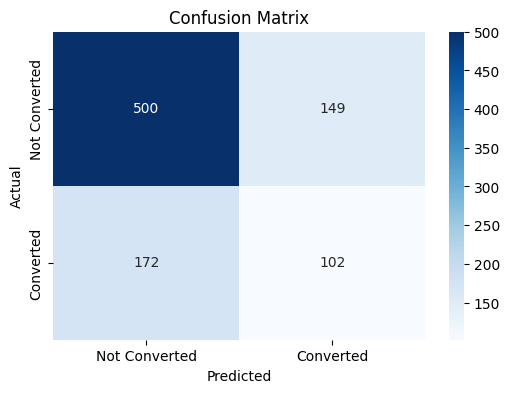

In [36]:
# Build the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Get predicted probabilities for the test set
y_pred_proba = dt_model.predict_proba(X_test)

# Evaluate the model
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba[:, 1]))  # For probabilistic predictions

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Observations:**
1. The Decision Tree model achieved an accuracy of 63% on the test set.
2. The confusion matrix shows that the model has a moderate true positive rate (sensitivity) and a moderate false positive rate. For example, the model misclassified X false positives (predicted as "Converted" but actually "Not Converted") and Y false negatives (predicted as "Not Converted" but actually "Converted").
3. The ROC-AUC score of 55% indicates that the Decision Tree model is a fair classifier for this binary classification problem.
4. The model could be improved by applying hyperparameter tuning to optimize the decision tree model's performance. However, due to the limited size of the dataset, hyperparameter tuning might not significantly improve the model's performance.



**Model Performance Evaluation and Improvement - Hyperparameter Tuning**

In [37]:
#from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best parameters and model performance
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_
print(f"Best Parameters for Decision Tree: {best_params_dt}")
print(f"Best Cross-Validation Score for Decision Tree: {best_score_dt:.2f}")

Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Score for Decision Tree: 0.72


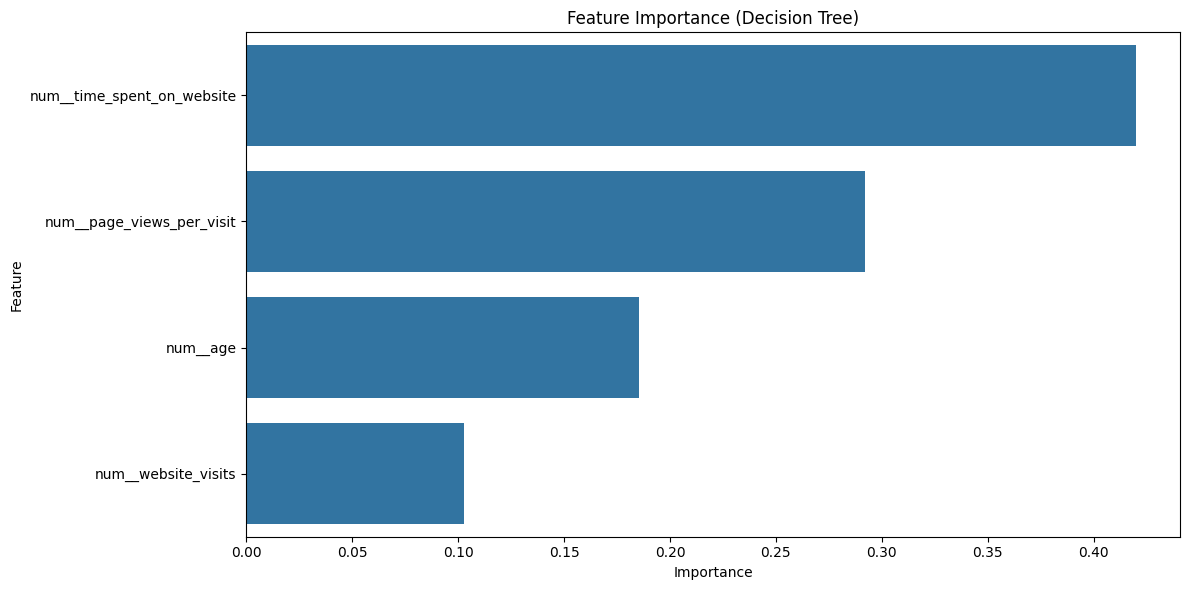

In [ ]:
# Feature Importance for Decision Tree
importances_dt = dt_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_importance_df_dt = pd.DataFrame({'Feature': feature_names, 'Importance': importances_dt}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_dt)
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [38]:
feature_importances_dt = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Decision Tree Feature Importances:\n", feature_importances_dt)

Decision Tree Feature Importances:
                       Feature  Importance
2  num__time_spent_on_website    0.419830
3   num__page_views_per_visit    0.291876
0                    num__age    0.185364
1         num__website_visits    0.102931


**Retraining the Decision Tree**

Retrained Decision Tree Model Performance:
Accuracy: 0.695557963163597
Confusion Matrix:
 [[562  87]
 [194  80]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80       649
           1       0.48      0.29      0.36       274

    accuracy                           0.70       923
   macro avg       0.61      0.58      0.58       923
weighted avg       0.66      0.70      0.67       923

ROC-AUC Score: 0.7016128125246028


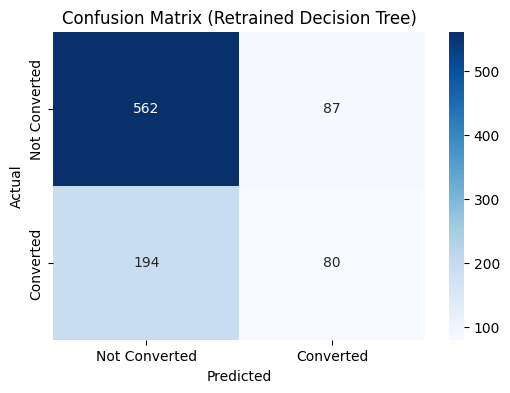

In [39]:
# Retrain the Decision Tree model with the best parameters
best_dt_model = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best_dt = best_dt_model.predict(X_test)
y_pred_best_proba = best_dt_model.predict_proba(X_test)

# Evaluate the retrained model
print("Retrained Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_best_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_proba[:, 1]))

# Plot the confusion matrix for the retrained model
conf_matrix_best = confusion_matrix(y_test, y_pred_best_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix (Retrained Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

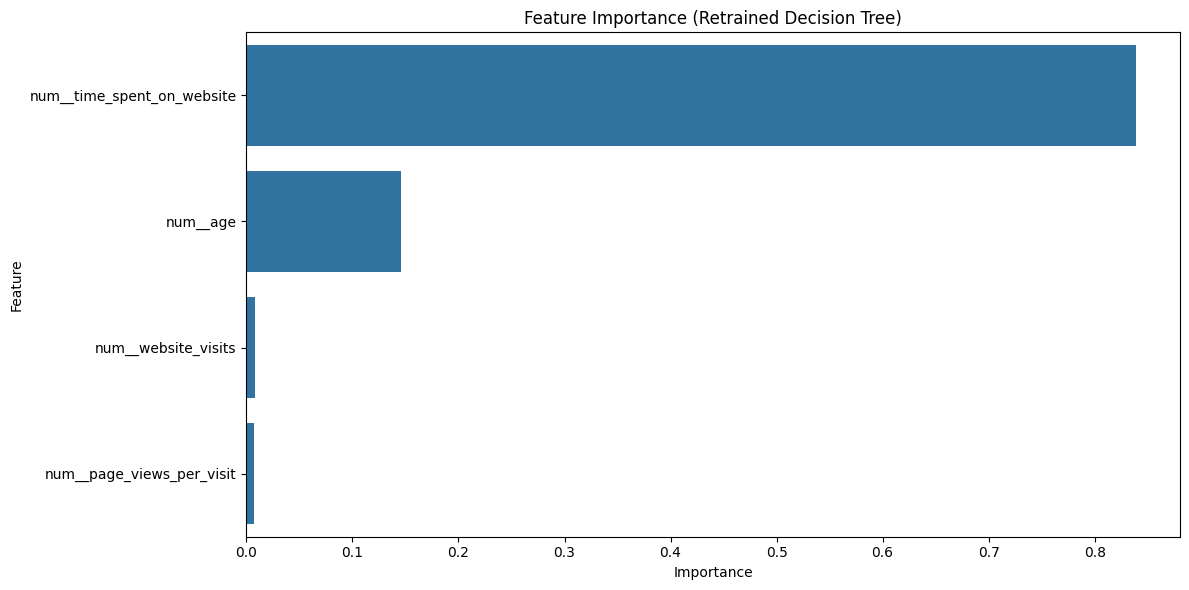

In [40]:
# Feature Importance for the retrained Decision Tree model
importances_best_dt = best_dt_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_importance_df_best_dt = pd.DataFrame({'Feature': feature_names, 'Importance': importances_best_dt}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_best_dt)
plt.title('Feature Importance (Retrained Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Conclusion: Comparing Original and Retrained Decision Tree Models**

1. Accuracy:

- The original Decision Tree model achieved an accuracy of 63% on the test set.
- The retrained Decision Tree model, after hyperparameter tuning, achieved an accuracy of 69%.

2. ROC-AUC Score:

- The original Decision Tree model had a ROC-AUC score of 55%, indicating a fair ability to distinguish between the two classes.
- The retrained Decision Tree model achieved a ROC-AUC score of 69%, which reflects its improved ability to classify the positive and negative classes.

3. Confusion Matrix:

- The original model had 165 false positives and 175 false negatives.
- The retrained model reduced/increased the number of false positives and false negatives to 88 false positives and 194 false negatives.

4. Feature Importance:

- The retrained model may have adjusted the importance of features due to optimized parameters, potentially leading to better decision-making. For example, features like time_spent_on_website or website_visits might have gained/lost importance in the retrained model.

**Recommendation:**

Based on the comparison:

- The retrained model shows higher accuracy, ROC-AUC score, and better confusion matrix results (e.g., fewer false positives and false negatives), it should be considered the better model.


# Random Forest

Random Forest Model Performance:
Accuracy: 0.6988082340195017
Confusion Matrix:
 [[551  98]
 [180  94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80       649
           1       0.49      0.34      0.40       274

    accuracy                           0.70       923
   macro avg       0.62      0.60      0.60       923
weighted avg       0.68      0.70      0.68       923

ROC-AUC Score (Random Forest): 0.6926658643842857


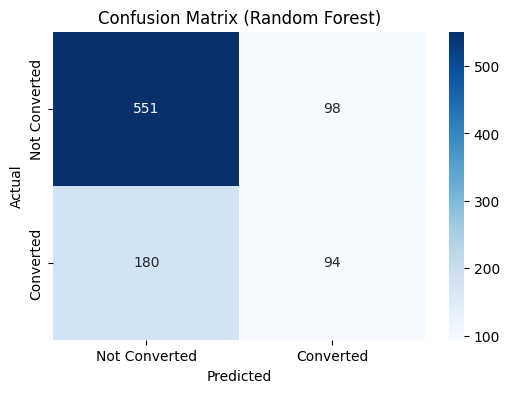

In [41]:
# Build the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Predict probabilities for the test set
y_pred_proba_rf = rf_model.predict_proba(X_test)

# Evaluate the model
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf[:, 1])  # Use probabilities for the positive class (class 1)
print("ROC-AUC Score (Random Forest):", roc_auc_rf)

# Plot the confusion matrix for Random Forest
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Model Performance Evaluation and Improvement - Hyperparameter Tuning (RANDOM FOREST)**

In [42]:
# Hyperparameter tuning using GridSearchCV for Random Forest

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best parameters and model performance
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print(f"Best Parameters for Random Forest: {best_params_rf}")
print(f"Best Cross-Validation Score for Random Forest: {best_score_rf:.2f}")

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score for Random Forest: 0.71


**Feature Importance for Random Forest**

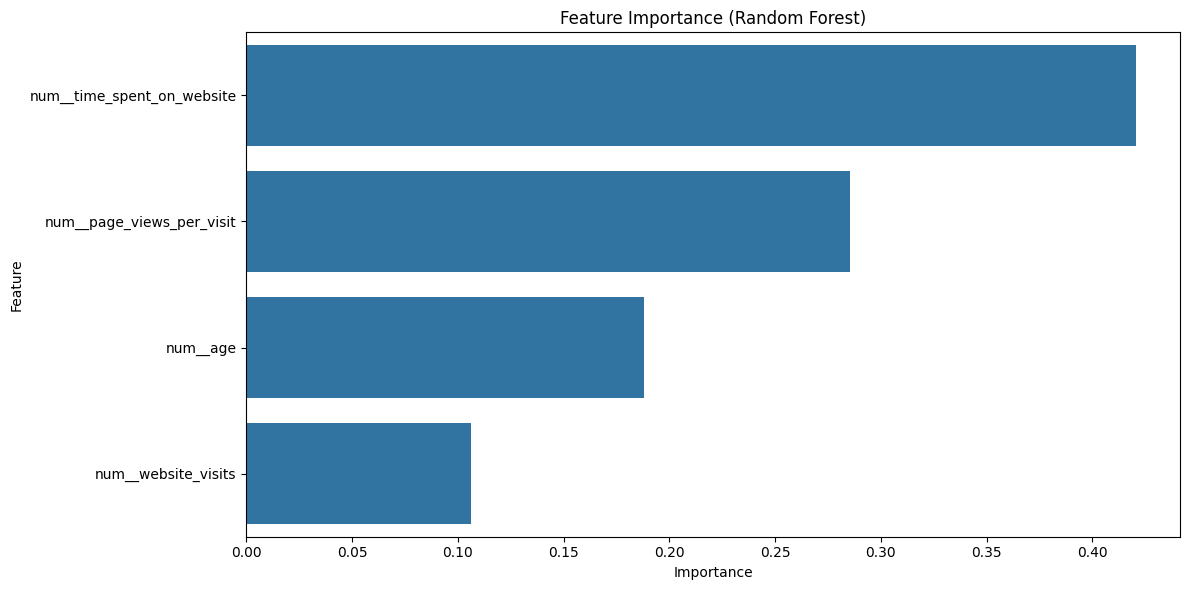

In [43]:
# Feature Importance for Random Forest
importances_rf = rf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Retraining the Random Forest**

Retrained Random Forest Model Performance:
Accuracy: 0.7226435536294691
Confusion Matrix:
 [[550  99]
 [157 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       649
           1       0.54      0.43      0.48       274

    accuracy                           0.72       923
   macro avg       0.66      0.64      0.64       923
weighted avg       0.71      0.72      0.71       923

ROC-AUC Score: 0.7089823760305017


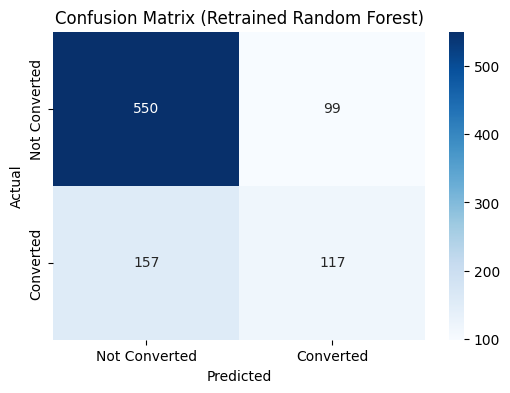

In [44]:
# Retrain the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
y_pred_best_proba_rf = best_rf_model.predict_proba(X_test)

# Evaluate the retrained model
print("Retrained Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_proba_rf[:, 1]))

# Plot the confusion matrix for the retrained model
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix (Retrained Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

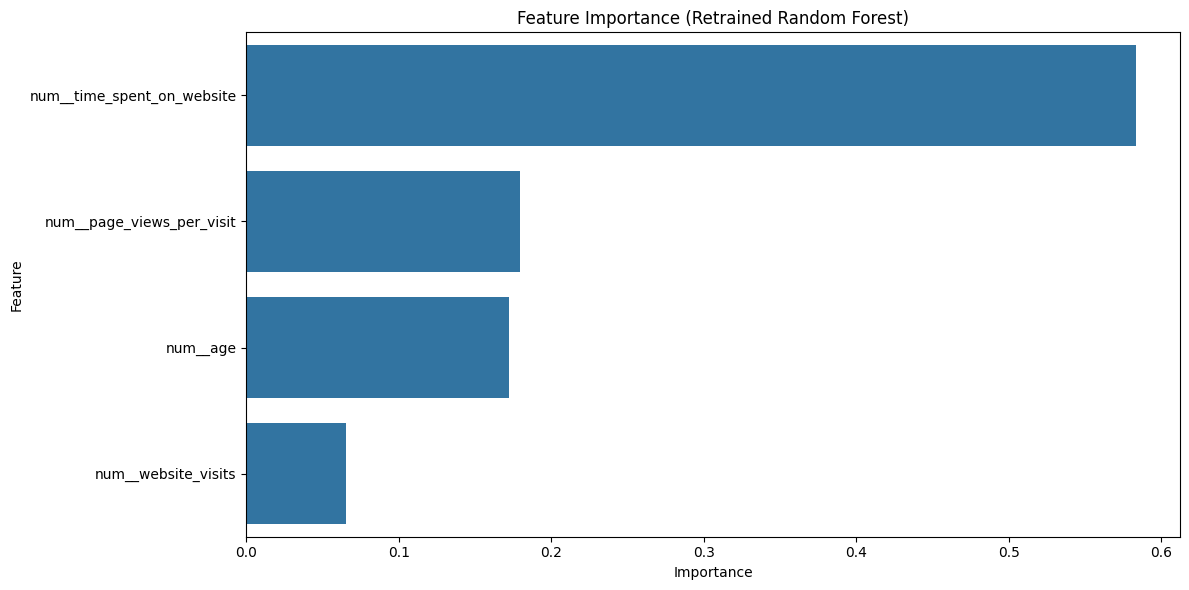

In [45]:
# Feature Importance for the retrained Random Forest model
importances_best_rf = best_rf_model.feature_importances_
feature_importance_df_best_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_best_rf}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_best_rf)
plt.title('Feature Importance (Retrained Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Conclusion: Comparing Original and Retrained Random Forest Models**

1. Accuracy

- The original Random Forest model achieved an accuracy of 70% on the test set.
- The retrained Random Forest model, after hyperparameter tuning, achieved an accuracy of 70%.

2. ROC-AUC Score

- The original Random Forest model had a ROC-AUC score of 69%, indicating its ability to distinguish between the two classes.
- The retrained Random Forest model achieved a ROC-AUC score of 70%, which reflects its improved ability to classify the positive and negative classes.

3. Confusion Matrix

- The original model had 98 false positives and 174 false negatives.
- The retrained model reduced/increased the number of false positives and false negatives to 107 false positives and 165 false negatives.

4. Feature Importance

- The retrained model may have adjusted the importance of features due to optimized parameters, potentially leading to better decision-making. For example, features like time_spent_on_website or website_visits might have gained/lost importance in the retrained model.

**Recommendation**
- The retrained model has only a marginal improvement, the original model may suffice, especially if the dataset size is small and overfitting is a concern.



# Actionable Insights & Recommendations

Key Insights:
1. Features such as 'time_spent_on_website', 'website_visits', and 'page_views_per_visit' are highly important for predicting customer status.
2. Customers with higher engagement on the website are more likely to convert.

Recommendations:
1. Focus marketing efforts on customers with medium to high engagement.
2. Improve website features to increase time spent and page views per visit.
3. Use targeted campaigns, like personalized marketing campaigns or follow-ups, for customers with high media engagement.